In [131]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [132]:
df = pd.read_csv('/Users/uce/Desktop/DataAnalytics/data-labs/happiness_project/Happiness-Team/Data/happy_final_final.csv')

In [133]:
df.head()

,country,year,region,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Afghanistan,2008,South Asia,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,South Asia,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,South Asia,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,South Asia,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,South Asia,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [134]:
df.dtypes

country                          object
year                              int64
region                           object
ladder_score                    float64
logged_gdp_per_capita           float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [135]:
df_num = df.select_dtypes(exclude='object')

In [136]:
df_cat = df.select_dtypes(include='object')

In [137]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          2156 non-null   int64  
 1   ladder_score                  2156 non-null   float64
 2   logged_gdp_per_capita         2156 non-null   float64
 3   social_support                2156 non-null   float64
 4   healthy_life_expectancy       2156 non-null   float64
 5   freedom_to_make_life_choices  2156 non-null   float64
 6   generosity                    2156 non-null   float64
 7   perceptions_of_corruption     2156 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 134.9 KB


In [138]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  2156 non-null   object
 1   region   2156 non-null   object
dtypes: object(2)
memory usage: 33.8+ KB


In [139]:
y = df_num['ladder_score'] # declaring a dependend variable

In [140]:
df_num.drop(['ladder_score'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [141]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          2156 non-null   int64  
 1   logged_gdp_per_capita         2156 non-null   float64
 2   social_support                2156 non-null   float64
 3   healthy_life_expectancy       2156 non-null   float64
 4   freedom_to_make_life_choices  2156 non-null   float64
 5   generosity                    2156 non-null   float64
 6   perceptions_of_corruption     2156 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 118.0 KB


In [142]:
len(df_cat['region'].unique())

10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'logged_gdp_per_capita'}>,
        <AxesSubplot:title={'center':'social_support'}>],
       [<AxesSubplot:title={'center':'healthy_life_expectancy'}>,
        <AxesSubplot:title={'center':'freedom_to_make_life_choices'}>,
        <AxesSubplot:title={'center':'generosity'}>],
       [<AxesSubplot:title={'center':'perceptions_of_corruption'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

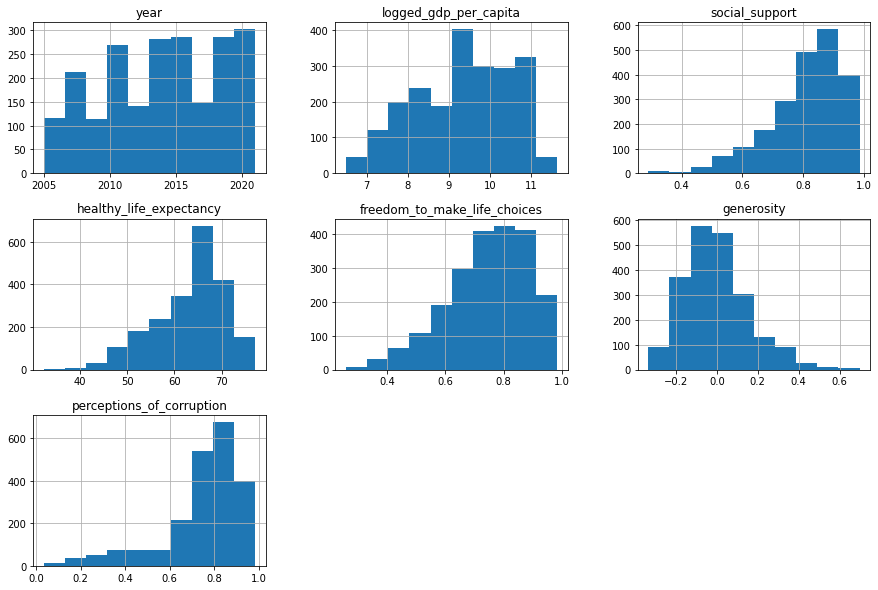

In [143]:
df_num.hist(figsize=(15, 10))

# normalising

In [144]:
standard = StandardScaler().fit(df_num)

In [145]:
x_standard = standard.transform(df_num)

In [146]:
st_scaled = pd.DataFrame(x_standard)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

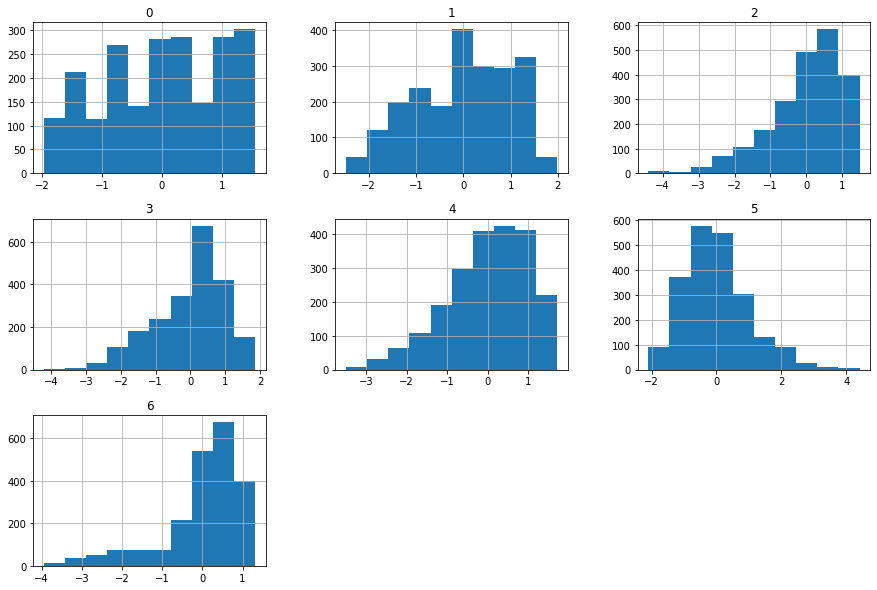

In [147]:
st_scaled.hist(figsize=(15, 10))

In [148]:
le = preprocessing.LabelEncoder()

In [149]:
df_cat = df_cat.apply(le.fit_transform)

In [150]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   country  2156 non-null   int64
 1   region   2156 non-null   int64
dtypes: int64(2)
memory usage: 33.8 KB


In [151]:
X = pd.concat([scaled, df_cat], axis=1)

In [152]:
X.head()

,0,1,2,3,4,5,6,country,region
0,0.1875,0.170184,0.230990,0.412946,0.632737,0.486931,0.893460,0,6
1,0.2500,0.203159,0.375897,0.421875,0.579092,0.508228,0.859705,0,6
2,0.3125,0.223914,0.357245,0.430804,0.470426,0.441433,0.708861,0,6
3,0.3750,0.218677,0.331420,0.437946,0.327373,0.481123,0.734177,0,6
4,0.4375,0.235165,0.331420,0.445089,0.375516,0.552759,0.781646,0,6


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [154]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train) # teach the model to find the line of best fit 
predictions = lm.predict(X_test) # run predictions based on X_test
r2_score(y_test, predictions) # compare y_test to predictions 

0.7426294995562686

In [155]:
mse=mean_squared_error(y_test, predictions)

In [156]:
mse

0.3240953532851986

In [157]:
rmse=np.sqrt(mse)

In [158]:
rmse

0.5692937319918414

# Visualise

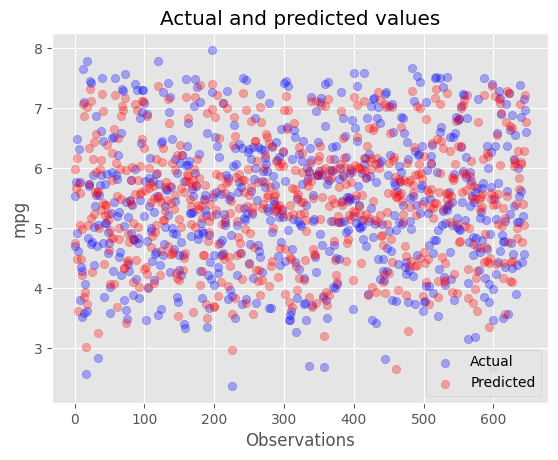